# Punto 1
> La regresión logística es uno de los métodos de aprendizaje automático que se utiliza para resolver problemas de clasificación binaria de una manera muy eficiente. Identifica una situación real (centro laboral, negocio, hogar) de la cual puedas adquirir una cantidad considerable de datos y que represente una problemática de clasificación binaria, por ejemplo: (0/1), (si/no), (continuar/detener), entre otras. Elabora un programa en Python donde, a partir del análisis previo del comportamiento de los datos, puedas elaborar un modelo capaz de predecir el resultado adecuado para nuevas condiciones que se pudieran presentar.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import pydotplus
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
data = pd.read_csv('Datos/tested.csv')
Ganacia = data.iloc[:, 5].to_numpy()
tipo = data.iloc[:, 1].to_numpy()
fig = px.violin(data, y=Ganacia, x=tipo)
fig.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(Ganacia, tipo, train_size = 0.75 )
modelo = LogisticRegression()
modelo_entrenado = modelo.fit(X_train.reshape(-1, 1), y_train)
y_pred = modelo_entrenado.predict(X_test.reshape(-1, 1))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[64,  0],
       [41,  0]], dtype=int64)

Text(0.5, 23.52222222222222, 'Valor Predecido')

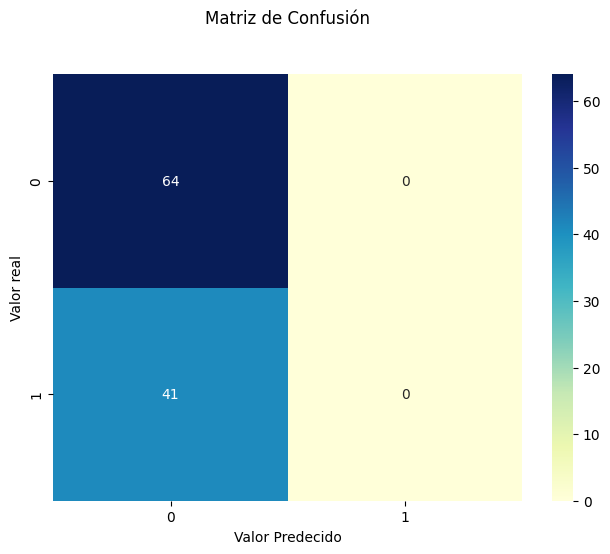

In [6]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')

# **Punto 3**
> Analiza nuevamente la problemática identificada en la pregunta 1 y responde estas preguntas:
*   A.	¿Se puede resolver mediante un modelo de árbol de decisión?
*   B.	¿Consideras posible extender el análisis inicial, a una situación donde pudieran estar involucradas nuevas variables de salida? ¿Cómo lo harías?
> Partiendo de las respuestas que obtuviste después de realizar el análisis, elabora un nuevo modelo en Python que solucione la problemática con las nuevas condiciones, pero en esta ocasión utiliza el modelo de árbol de decisión que mejor se adecúe a estas.

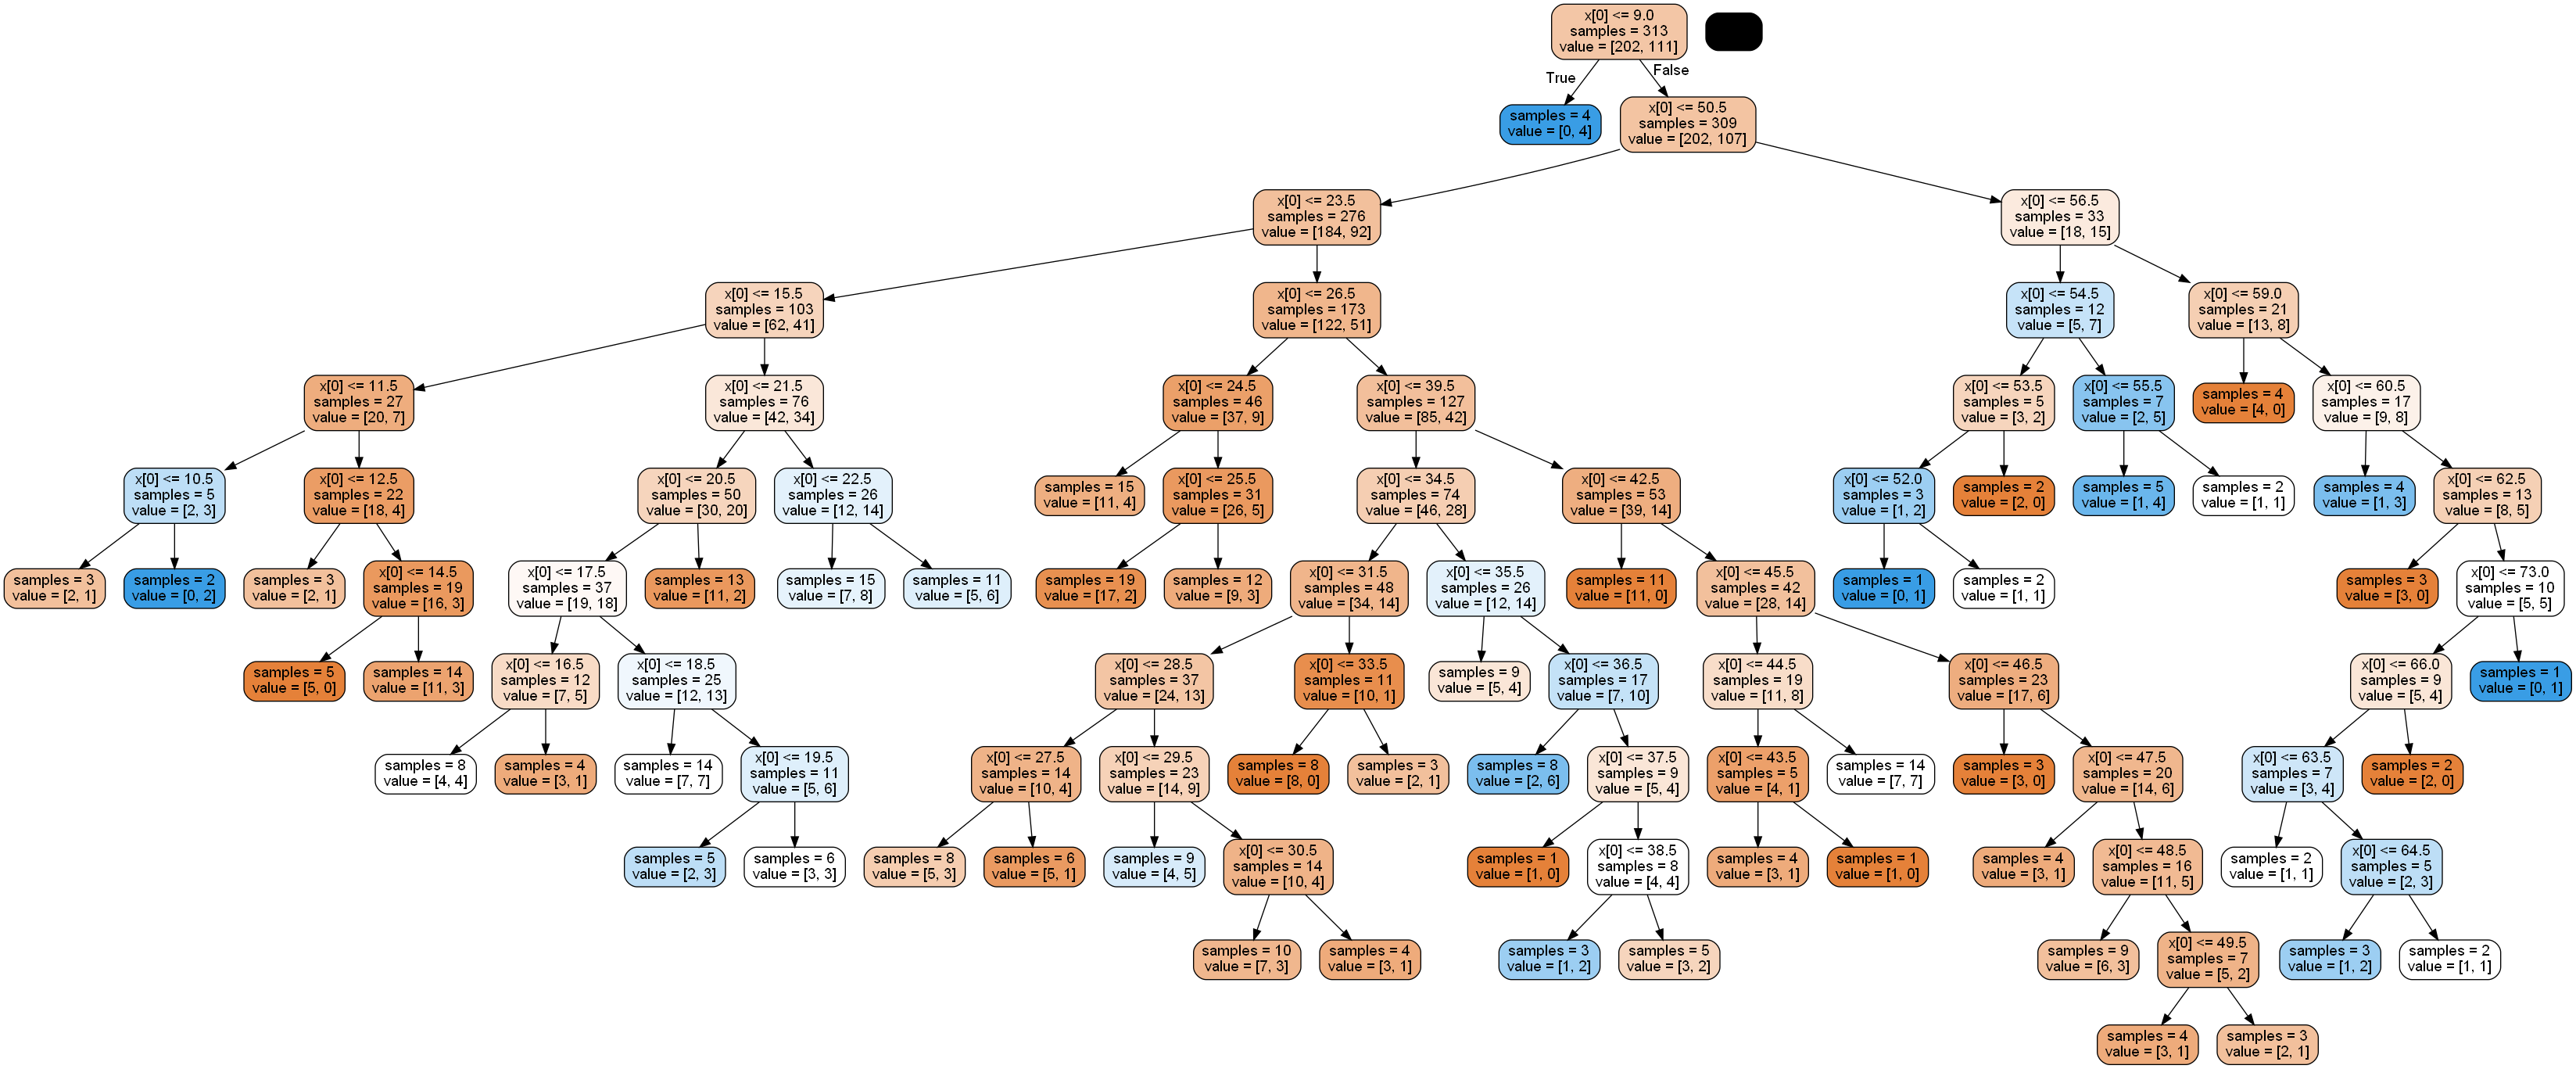

In [7]:
arbol=DecisionTreeClassifier() #si se desea limitar es con max_depth=4 [este ejemplo dice que solo los primeros 4]
arbol_enfermedad=arbol.fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))
# Create DOT data
dot_data = tree.export_graphviz(arbol_enfermedad, out_file=None, filled=True, rounded=True, special_characters=False, impurity=False, )
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# Punto 4
> Con la metodología desarrollada en la pregunta 2 evalúa el desempeño del nuevo modelo y compáralo con los resultados obtenidos con su homólogo de regresión logística (pregunta 1) para la problemática original. Incluye tus conclusiones en el documento electrónico de la actividad.

In [10]:
modelo_reglog = LogisticRegression()
modelo_entrenado = modelo_reglog.fit(X_train.reshape(-1, 1),y_train)
modelo_entrenado.coef_
y_pred = modelo_entrenado.predict(X_test.reshape(-1, 1))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[64,  0],
       [41,  0]], dtype=int64)

Text(0.5, 23.52222222222222, 'Valor Predecido')

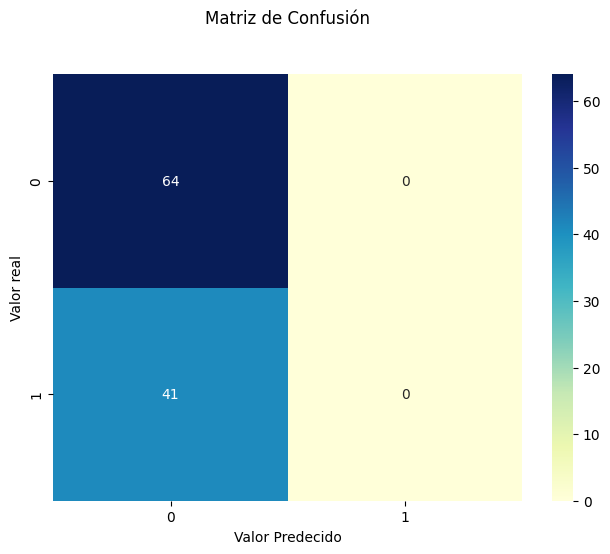

In [11]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')

plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')